In [ ]:
pip install matplotlib

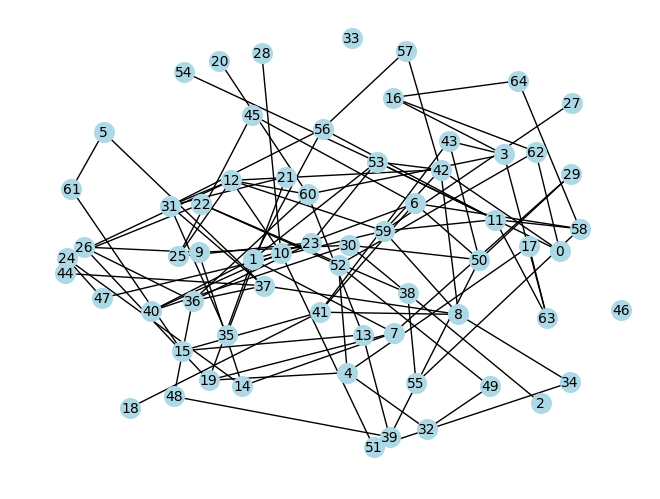

In [125]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import OrderedDict

# Создать пустой граф
G = nx.Graph()

# Добавить вершины
for i in range(65):
    G.add_node(i)

# Добавить ребра
for i in range(105):
    u = [random.choice(list(G.nodes())), random.choice(list(G.nodes()))]
    G.add_edge(u[0], u[1])

# Определить оптимальное размещение вершин
pos = nx.spring_layout(G, k=0.8)

# Визуализация графа
nx.draw(G, pos, with_labels=True, node_size=200, node_color="lightblue", font_size=10)
plt.show()

12


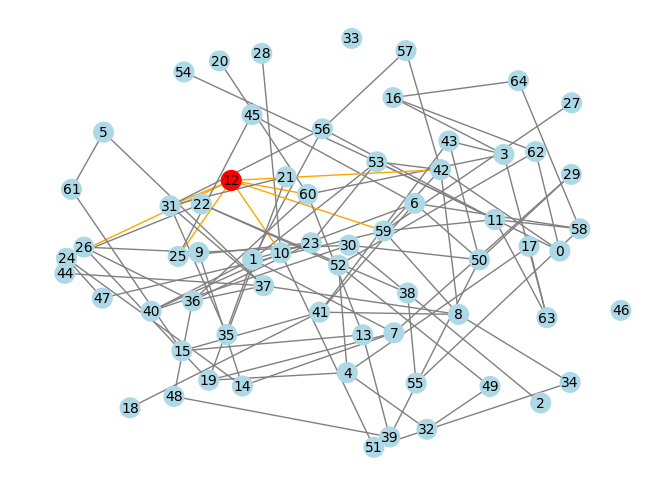

In [126]:
# Вычислить центральность промежуточности
betweenness = nx.betweenness_centrality(G)

# Вершина с наибольшей промежуточной центральностью
central_vertex = max(betweenness, key=betweenness.get)

# Цвет для вершин и граней
central_vertex_color = 'red'
adjacent_faces_color = 'orange'
print(central_vertex)

# Визуализация центральной вершины графа и примыкающих граней
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10,
        edge_color=[adjacent_faces_color if ((u in G.neighbors(central_vertex) and v == central_vertex) or (u == central_vertex and v in G.neighbors(central_vertex))) else 'gray' for u, v in G.edges()],
        node_color=[central_vertex_color if node == central_vertex else 'lightblue' for node in G.nodes()])
plt.show()

In [127]:
#Запись соседних вершин в массив
nodes_td = []
for u in G.neighbors(central_vertex):
    # Check if the neighbor has an orange face connected to it
    if (u in G.neighbors(central_vertex) and any(v == central_vertex for v in G.neighbors(u))):
        nodes_td.append(u)
print(nodes_td)

[25, 24, 59, 10, 60, 42, 31]


In [128]:
# Удаление центральной вершины
G.remove_node(central_vertex)


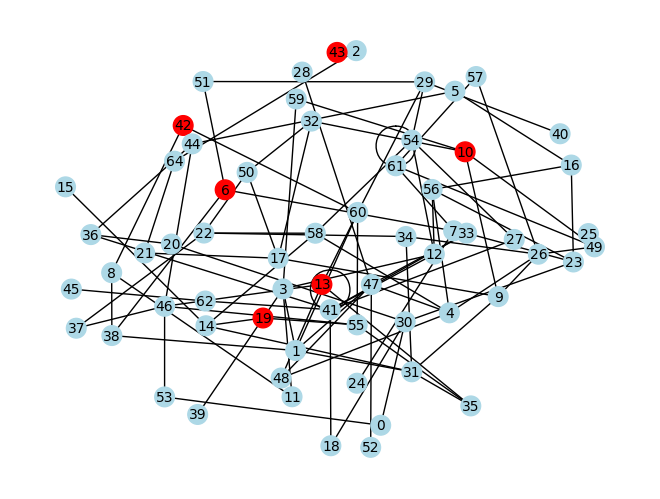

In [121]:
# Перерисовка графа
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10,
        node_color=[central_vertex_color if node in nodes_td else 'lightblue' for node in G.nodes()])
plt.show()

In [129]:
print(nodes_td)

[25, 24, 59, 10, 60, 42, 31]


ВОТ ОТСЮДА НУЖНА ФУНКЦИЯ


In [130]:
def main_f(nodes_fmf, gr):
  edges_td = []
  next_vertex = []
  for t in nodes_fmf:
    for u in gr.neighbors(t):
        # Check if the neighbor has an orange face connected to it
        if (u in gr.neighbors(t) and any(v == t for v in gr.neighbors(u))):
            edges_td.append([u,t])
            next_vertex.append(u)
            #можно добавить поменяв местами
  #Удаляем дубликаты
  ####### next_vertex = list(OrderedDict.fromkeys(next_vertex))
  next_vertex = [x for x in list(OrderedDict.fromkeys(next_vertex)) if x not in nodes_fmf]
  # Разрушние следующих вершин
  print("Грани",edges_td)
  print("Вершины",next_vertex)
  # Перерисовка графа
  nx.draw(gr, pos, with_labels=True, node_size=200, font_size=10,
        edge_color=[adjacent_faces_color if [u,v] in edges_td or [v,u] in edges_td  else 'gray' for u, v in gr.edges()],
        node_color=[central_vertex_color if node in nodes_fmf else 'lightblue' for node in gr.nodes()])
  plt.show()
  print("Разрушение")
  for node in nodes_fmf:
    gr.remove_node(node)
  nx.draw(gr, pos, with_labels=True, node_size=200, font_size=10,
        node_color=[central_vertex_color if node in next_vertex else 'lightblue' for node in gr.nodes()])
  plt.show()
  if len(gr.edges) != 0:
    main_f(next_vertex,gr)
  else:
    return next_vertex, gr

Грани [[45, 25], [23, 25], [47, 24], [14, 24], [22, 24], [47, 59], [8, 59], [27, 59], [11, 59], [42, 59], [28, 10], [51, 10], [6, 10], [40, 10], [20, 60], [36, 60], [13, 60], [3, 60], [57, 42], [8, 42], [53, 42], [0, 42], [59, 42], [35, 31], [37, 31], [56, 31], [21, 31]]
Вершины [45, 23, 47, 14, 22, 8, 27, 11, 28, 51, 6, 40, 20, 36, 13, 3, 57, 53, 0, 35, 37, 56, 21]


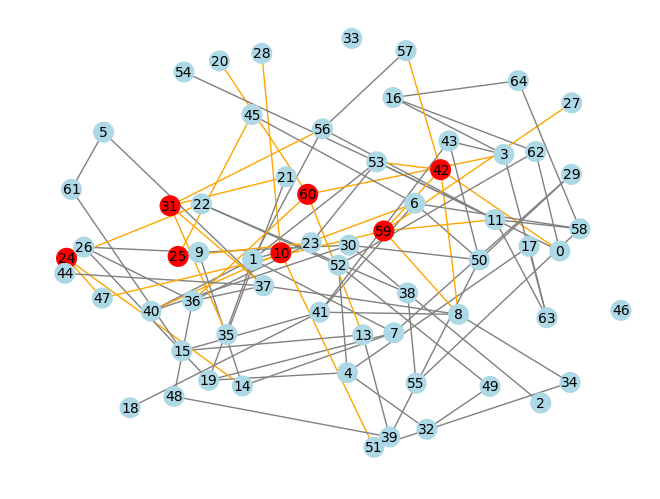

Разрушение


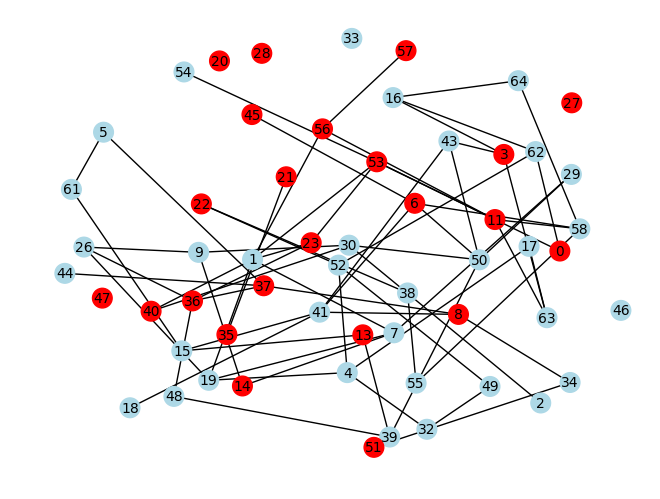

Грани [[6, 45], [36, 23], [53, 23], [1, 23], [7, 14], [9, 14], [52, 22], [38, 22], [34, 8], [37, 8], [41, 8], [63, 11], [58, 11], [53, 11], [56, 11], [34, 51], [58, 6], [50, 6], [45, 6], [41, 6], [1, 40], [30, 40], [23, 36], [37, 36], [26, 36], [48, 36], [15, 13], [39, 13], [16, 3], [43, 3], [63, 3], [56, 57], [23, 53], [1, 53], [54, 53], [11, 53], [0, 53], [62, 0], [53, 0], [21, 35], [36, 37], [5, 37], [44, 37], [8, 37], [57, 56], [1, 56], [11, 56], [35, 21]]
Вершины [1, 7, 9, 52, 38, 34, 41, 63, 58, 50, 30, 26, 48, 15, 39, 16, 43, 54, 62, 5, 44]


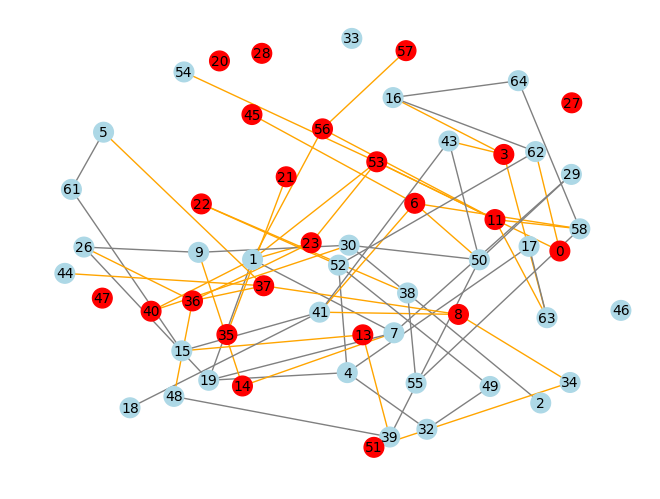

Разрушение


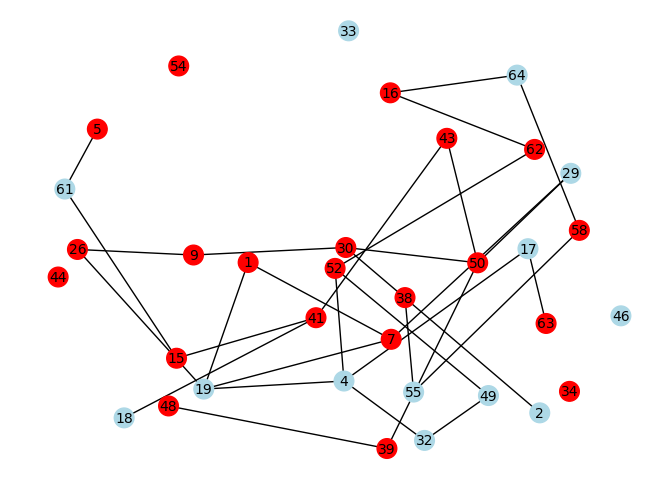

Грани [[19, 1], [7, 1], [29, 7], [19, 7], [1, 7], [26, 9], [30, 9], [49, 52], [4, 52], [62, 52], [55, 38], [15, 41], [18, 41], [43, 41], [17, 63], [64, 58], [55, 58], [39, 50], [43, 50], [29, 50], [30, 50], [2, 30], [50, 30], [9, 30], [9, 26], [19, 26], [39, 48], [41, 15], [61, 15], [50, 39], [48, 39], [64, 16], [62, 16], [50, 43], [41, 43], [16, 62], [52, 62], [61, 5]]
Вершины [19, 29, 49, 4, 55, 18, 17, 64, 2, 61]


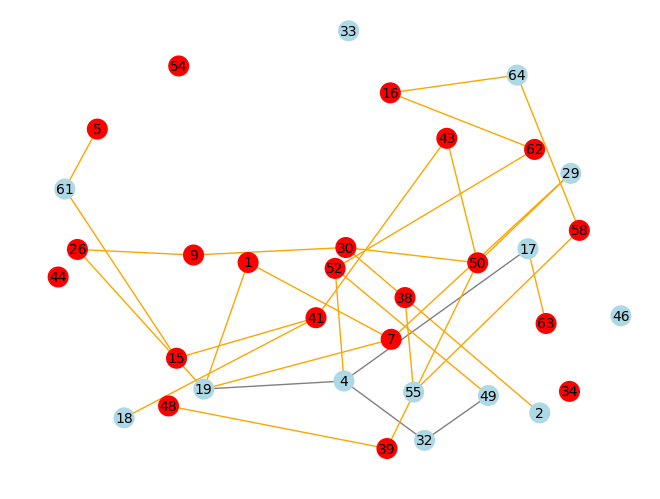

Разрушение


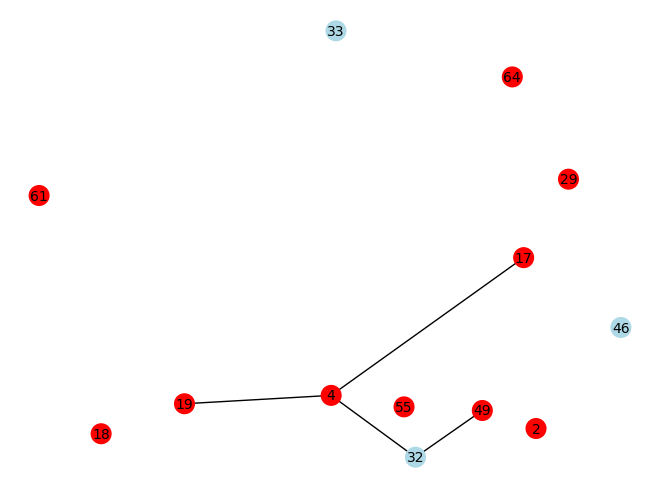

Грани [[4, 19], [32, 49], [32, 4], [19, 4], [17, 4], [4, 17]]
Вершины [32]


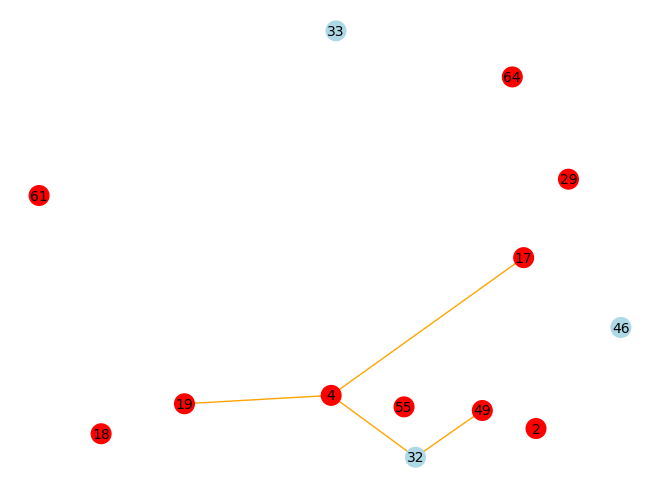

Разрушение


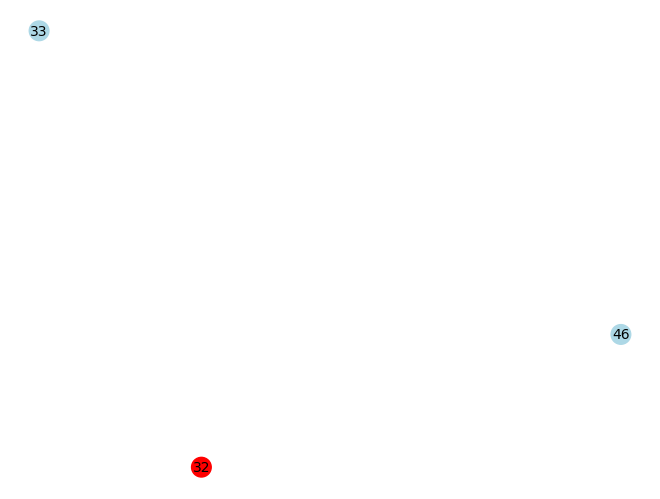

In [131]:
main_f(nodes_td, G)


Test


In [89]:
edges_td2 = []
next_vertex2 = []
for t in res:
  for u in gr.neighbors(t):
      # Check if the neighbor has an orange face connected to it
      if (u in gr.neighbors(t) and any(v == t for v in G.neighbors(u))):
          edges_td2.append([u,t])
          next_vertex2.append(u)
          #можно добавить поменяв местами
#Удаляем дубликаты
next_vertex2 = list(OrderedDict.fromkeys(next_vertex2))
print("грани",edges_td2)
print("вершины",next_vertex2)

грани [[47, 47], [27, 47], [29, 47], [56, 47], [18, 47], [43, 10], [38, 10], [8, 18], [47, 18], [21, 18], [55, 6], [34, 6], [49, 59], [1, 33], [61, 33], [34, 37], [53, 37], [57, 37], [16, 37], [62, 37], [17, 23], [21, 23], [0, 23], [45, 23], [23, 0], [50, 0], [9, 0], [17, 28], [12, 28], [62, 28], [25, 28], [34, 28]]
вершины [47, 27, 29, 56, 18, 43, 38, 8, 21, 55, 34, 49, 1, 61, 53, 57, 16, 62, 17, 0, 45, 23, 50, 9, 12, 25]


In [36]:
edges_td = []
next_vertex = []
for t in nodes_td:
  for u in G.neighbors(t):
      # Check if the neighbor has an orange face connected to it
      if (u in G.neighbors(t) and any(v == t for v in G.neighbors(u))):
          edges_td.append([u,t])
          next_vertex.append(u)
          #можно добавить поменяв местами
#Удаляем дубликаты
next_vertex = list(OrderedDict.fromkeys(next_vertex))
print("грани",edges_td)
print("вершины",next_vertex)

грани [[48, 31], [24, 31], [15, 25], [21, 25], [22, 25], [9, 25], [63, 25], [55, 25], [9, 51], [35, 50], [46, 50], [33, 7], [20, 7], [28, 7], [53, 7], [58, 11], [33, 11], [4, 11], [49, 11], [46, 46], [23, 46], [1, 46], [50, 46]]
вершины [48, 24, 15, 21, 22, 9, 63, 55, 35, 46, 33, 20, 28, 53, 58, 4, 49, 23, 1, 50]


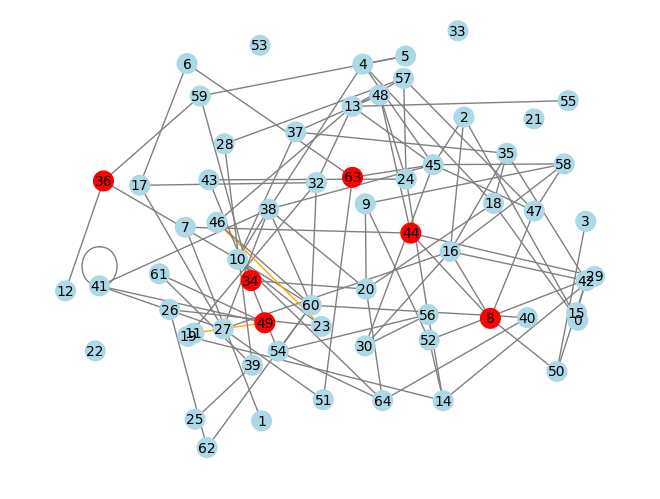

In [48]:
# Перерисовка графа
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10,
        edge_color=[adjacent_faces_color if [u,v] in edges_td or [v,u] in edges_td  else 'gray' for u, v in G.edges()],
        node_color=[central_vertex_color if node in nodes_td else 'lightblue' for node in G.nodes()])
plt.show()



In [ ]:
for node in nodes_td:
  G.remove_node(node)

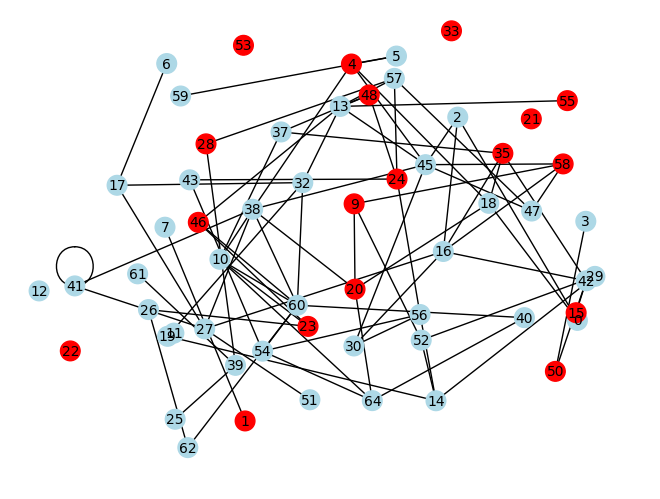

In [50]:
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10,
        node_color=[central_vertex_color if node in next_vertex else 'lightblue' for node in G.nodes()])
plt.show()


In [106]:
print(gr.nodes)

[7]


Грани [[47, 47], [27, 47], [29, 47], [56, 47], [18, 47], [43, 10], [38, 10], [8, 18], [47, 18], [21, 18], [55, 6], [34, 6], [49, 59], [1, 33], [61, 33], [34, 37], [53, 37], [57, 37], [16, 37], [62, 37], [17, 23], [21, 23], [0, 23], [45, 23], [23, 0], [50, 0], [9, 0], [17, 28], [12, 28], [62, 28], [25, 28], [34, 28]]
Вершины [27, 29, 56, 43, 38, 8, 21, 55, 34, 49, 1, 61, 53, 57, 16, 62, 17, 45, 50, 9, 12, 25]


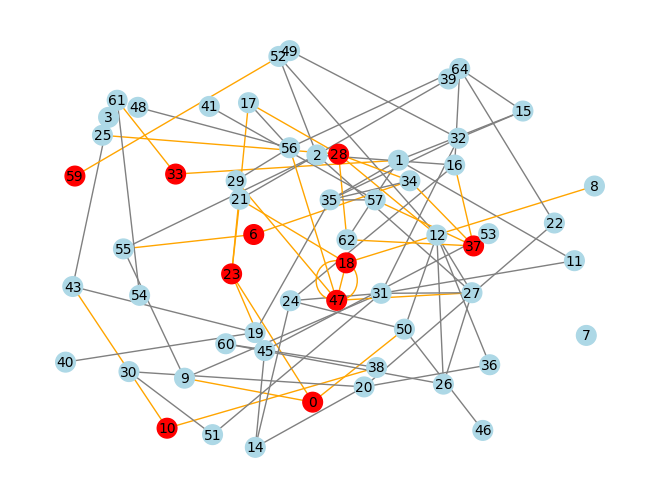

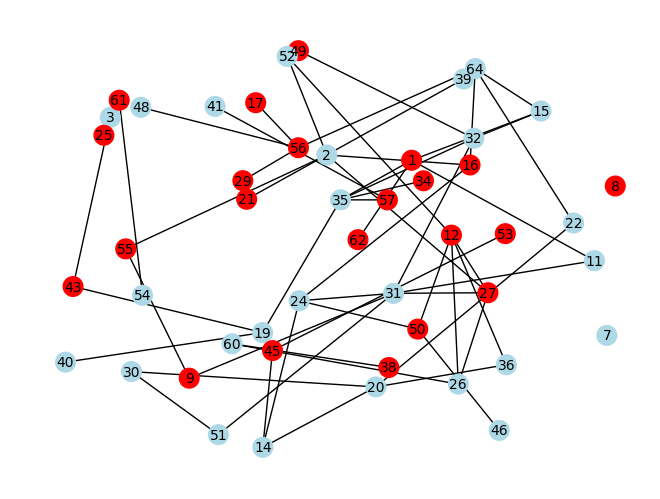

[27, 29, 56, 43, 38, 8, 21, 55, 34, 49, 1, 61, 53, 57, 16, 62, 17, 45, 50, 9, 12, 25]
Graph with 48 nodes and 55 edges


In [90]:
res2,gr2 = main_f(res, gr)
print(res2)
print(gr2)